/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-03 22:14:33.555515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-03 22:14:33.555616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-03-03 22:14:33.853243: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-03 22:14:34.001323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.8141

2023-03-03 22:14:43.833143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5389 - accuracy: 0.8142 - val_loss: 0.4431 - val_accuracy: 0.8463
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4093 - accuracy: 0.8570 - val_loss: 0.4338 - val_accuracy: 0.8464
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3750 - accuracy: 0.8684 - val_loss: 0.3894 - val_accuracy: 0.8644
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3510 - accuracy: 0.8767 - val_loss: 0.3728 - val_accuracy: 0.8673
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3383 - accuracy: 0.8803 - val_loss: 0.3788 - val_accuracy: 0.8634
313/313 - 1s - loss: 0.3788 - accuracy: 0.8634 - 1s/epoch - 4ms/step
Test accuracy: 0.8634000420570374
Time elapsed:  52.89159798622131


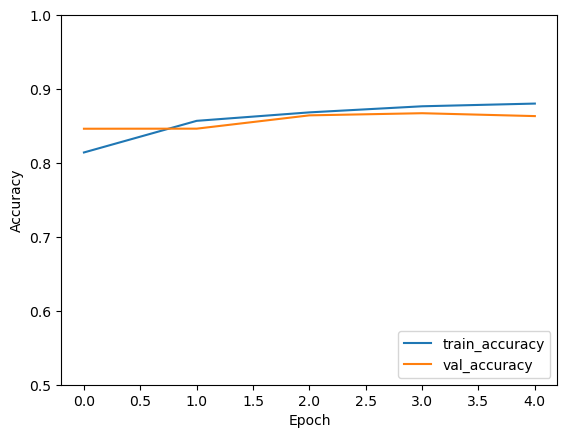

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) # modify input shape to include channel dimension
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3', trainable=False),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time-start_time)

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [2]:
total_time = end_time - start_time
print(f'Total time elapsed during training: {total_time:.2f} seconds')
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Total time elapsed during training: 6.77 seconds
12/12 [==============================] - 0s 4ms/step - loss: 0.2022 - accuracy: 0.9389
Test accuracy: 0.9388889074325562


In [3]:
#binirize after building the architecture
# Load the dataset
digits = load_digits()

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(digits.data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, test_size=0.2, random_state=42)


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Get the weights of the first Conv2D layer
conv1_weights = model.layers[0].get_weights()[0]
conv2_weights = model.layers[1].get_weights()[0]

# Apply a threshold of 0 to binarize the weights
threshold = 0
binary_weights = np.where(conv1_weights >= threshold, 1, -1)
binary_weights_2 = np.where(conv2_weights >= threshold, 1, -1)

# Set the binarized weights back to the Conv2D layer
model.layers[0].set_weights([binary_weights, model.layers[0].get_weights()[1]])
model.layers[1].set_weights([binary_weights_2, model.layers[1].get_weights()[1]])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
# Train the model
model.fit(X_train, y_train, epochs=20)
end_time = time.time()
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')



Epoch 1/20
22/45 [=============>................] - ETA: 0s - loss: 32.6383 - accuracy: 0.1903

2023-02-21 14:03:55.939948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 5ms/step - loss: 22.3492 - accuracy: 0.2923
Epoch 2/20
45/45 [==============================] - 0s 5ms/step - loss: 5.1625 - accuracy: 0.6555
Epoch 3/20
45/45 [==============================] - 0s 5ms/step - loss: 2.6114 - accuracy: 0.7864
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 1.6560 - accuracy: 0.8532
Epoch 5/20
45/45 [==============================] - 0s 5ms/step - loss: 1.0446 - accuracy: 0.8831
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.7227 - accuracy: 0.9130
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.9332
Epoch 8/20
45/45 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.9527
Epoch 9/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1986 - accuracy: 0.9694
Epoch 10/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1210 - accuracy: 0.9812
Epoch 11/20
45/45 [==========

2023-02-21 14:04:00.594920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [4]:
total_time = end_time - start_time
print(f'Total time elapsed during training: {total_time:.2f} seconds')
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Total time elapsed during training: 4.75 seconds
12/12 [==============================] - 0s 4ms/step - loss: 1.1645 - accuracy: 0.8472
Test accuracy: 0.8472222685813904
